<a href="https://colab.research.google.com/github/kingsmen732/etc/blob/main/version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM, Dense
import sklearn.metrics

In [6]:
SHEET_ID = '1CAUr5wAQRprvLhT8V8BH3syiFeKdtYKvK_QycPI-OVo'
def select_company(comp_name):
    # Reliance
    if comp_name.lower() == "reliance":
        SHEET_NAME = 'Reliance'

    # State Bank of India
    elif comp_name.lower() == "state bank of india":
        SHEET_NAME = 'SBI'

    # Yes Bank
    elif comp_name.lower() == "yes bank":
        SHEET_NAME = 'Yesbank'

    # Tata Motors
    elif comp_name.lower() == "tata motors":
        SHEET_NAME = 'TataMotors'

    # Zomato
    elif comp_name.lower() == "zomato":
        SHEET_NAME = 'Zomato'

    # Kotak Bank
    elif comp_name.lower() == "kotak bank":
        SHEET_NAME = 'KotakBank'

    # Bharat Heavy Electronics Limited
    elif comp_name.lower() == "bharat heavy electricals limited":
        SHEET_NAME = 'BHEL'

    # Reliance Power
    elif comp_name.lower() == "reliance power":
        SHEET_NAME = 'ReliancePower'

    # ICICI Bank
    elif comp_name.lower() == "icici bank":
        SHEET_NAME = 'ICICI'

    # National Thermal Power Corporation
    elif comp_name.lower() == "ntpc":
        SHEET_NAME = 'NTPC'

    url = f'https://docs.google.com/spreadsheets/d/{12q62Jx0-TCfelUa8rZ_oXBDqDmU18Y3QU5jv8CVAz-0}/gviz/tq?tqx=out:csv&sheet={SHEET_NAME}'
    df = pd.read_csv(url)
    df.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]
    return df

In [7]:
compname = input('Enter Company Name: ')

df = select_company(compname)

df

Enter Company Name: RELIANCE


,Date,Open,High,Low,Close,Volume
0,1/4/2010 15:30:00,540.43,540.43,506.13,532.70,17520006
1,1/5/2010 15:30:00,569.55,569.55,527.70,530.32,4890040
2,1/6/2010 15:30:00,534.88,542.11,530.30,538.89,5415538
3,1/7/2010 15:30:00,538.89,552.26,533.94,547.83,5988404
4,1/8/2010 15:30:00,548.80,551.67,542.85,546.40,3453926
...,...,...,...,...,...,...
3498,3/5/2024 15:30:00,3011.55,3014.80,2972.10,3000.40,3553834
3499,3/6/2024 15:30:00,2986.90,3018.00,2957.00,3006.00,3902838
3500,3/7/2024 15:30:00,3005.95,3006.20,2951.10,2957.85,4157863
3501,3/11/2024 15:30:00,2978.00,2978.00,2927.00,2933.20,5638565


In [8]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/4/2010 15:30:00,540.43,540.43,506.13,532.70,17520006
1,1/5/2010 15:30:00,569.55,569.55,527.70,530.32,4890040
2,1/6/2010 15:30:00,534.88,542.11,530.30,538.89,5415538
3,1/7/2010 15:30:00,538.89,552.26,533.94,547.83,5988404
4,1/8/2010 15:30:00,548.80,551.67,542.85,546.40,3453926


In [9]:
df_adjusted = df.loc[1:,]
df_adjusted[["Open", "High", "Low", "Close", "Volume"]] = df_adjusted[["Open", "High", "Low", "Close", "Volume"]].apply(pd.to_numeric)
df_adjusted["Date"] = pd.to_datetime(df_adjusted["Date"])

<ipython-input-9-2a85d4304053>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjusted[["Open", "High", "Low", "Close", "Volume"]] = df_adjusted[["Open", "High", "Low", "Close", "Volume"]].apply(pd.to_numeric)
<ipython-input-9-2a85d4304053>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjusted["Date"] = pd.to_datetime(df_adjusted["Date"])


In [10]:
df = df_adjusted

In [11]:
open_prices = df['Open']
values = open_prices.values
training_data_len = math.ceil(len(values)* 0.8)

#preprocessing using minmaxscaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

#getting the training set and testing set separated
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [12]:
#prep the testing set
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [13]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123751 (483.40 KB)
Trainable params: 123751 (483.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size= 2, epochs= 15)

Epoch 1/15
1371/1371 [==============================] - 67s 45ms/step - loss: 6.7116e-04
Epoch 2/15
1371/1371 [==============================] - 62s 45ms/step - loss: 3.1692e-04
Epoch 3/15
1371/1371 [==============================] - 62s 45ms/step - loss: 2.0061e-04
Epoch 4/15
1371/1371 [==============================] - 64s 47ms/step - loss: 2.2176e-04
Epoch 5/15
1371/1371 [==============================] - 67s 49ms/step - loss: 1.3844e-04
Epoch 6/15
1371/1371 [==============================] - 63s 46ms/step - loss: 1.9546e-04
Epoch 7/15
1371/1371 [==============================] - 63s 46ms/step - loss: 1.2273e-04
Epoch 8/15
1371/1371 [==============================] - 67s 49ms/step - loss: 1.8869e-04
Epoch 9/15
1371/1371 [==============================] - 63s 46ms/step - loss: 1.1278e-04
Epoch 10/15
1371/1371 [==============================] - 63s 46ms/step - loss: 1.3721e-04
Epoch 11/15
1371/1371 [==============================] - 65s 47ms/step - loss: 1.1825e-04
Epoch 12/15
1371/13

In [15]:
#evaluation
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


22/22 [==============================] - 2s 38ms/step


In [16]:
mse = sklearn.metrics.mean_squared_error(y_test, predictions)

rmse = math.sqrt(mse)
mae = sklearn.metrics.mean_absolute_error(y_test, predictions)
mse = sklearn.metrics.mean_squared_error(y_test, predictions)
r2 = sklearn.metrics.r2_score(y_test,predictions)

In [17]:
rmse

80.79777697401992

In [18]:
mae

70.80435065569196

In [19]:
r2

0.821446222778484

<ipython-input-20-7d4987a8a6b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


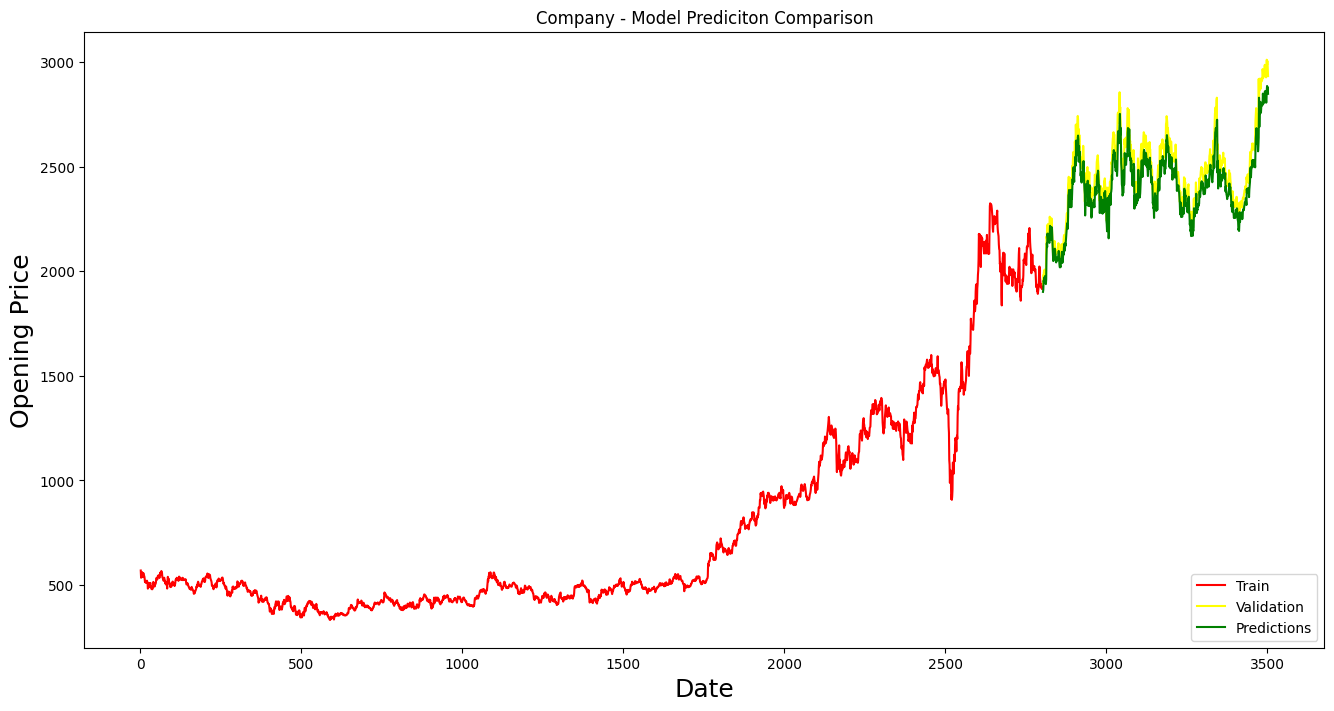

In [20]:
data= df.filter(['Open'])
train = data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Company - Model Prediciton Comparison')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Opening Price', fontsize=18)
plt.plot(train['Open'] , color='red')
plt.plot(valid['Open'] , color='yellow')
plt.plot(valid['Predictions'] , color='green')
plt.legend(['Train','Validation', 'Predictions'], loc='lower right')
plt.show()

In [22]:
new_df = df.filter(['Open'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(f'Opening Price of {compname} tomorrow:{pred_price}')


1/1 [==============================] - 0s 70ms/step
Opening Price of RELIANCE tomorrow:[[2808.0056]]


# ROUGH

In [24]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

workbook = gc.open_by_key('1CAUr5wAQRprvLhT8V8BH3syiFeKdtYKvK_QycPI-OVo')